In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
from __future__ import division                 #to avoid integer devision problem
import scipy
import pylab

#just for fun making further development easier and with joy
pi     = scipy.pi
dot    = scipy.dot
sin    = scipy.sin
cos    = scipy.cos
ar     = scipy.array
rand   = scipy.rand
arange = scipy.arange
plot   = pylab.plot
show   = pylab.show
axis   = pylab.axis
grid   = pylab.grid
title  = pylab.title
rad    = lambda ang: ang*pi/180                 #lovely lambda: degree to radian

#the function
def Rotate2D(pts,cnt,ang=pi/4):
    '''pts = {} Rotates points(nx2) about center cnt(2) by angle ang(1) in radian'''
    return dot(pts-cnt,ar([[cos(ang),sin(ang)],[-sin(ang),cos(ang)]]))+cnt

### Rotate a shape by angle in radians

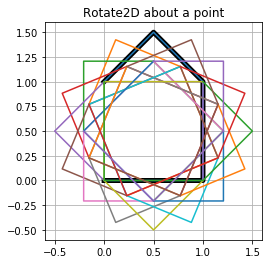

In [51]:
#the code for test
pts = ar([[0,0],[1,0],[1,1],[0.5,1.5],[0,1]])
plot(*pts.T,lw=5,color='k')                     #points (poly) to be rotated

for ang in arange(0,2*pi,pi/8):
    ots = Rotate2D(pts,ar([0.5,0.5]),ang)       #the results
    _ = plot(*ots.T)

_ = axis('image')
_ = grid(True)
_ = title('Rotate2D about a point')
show()

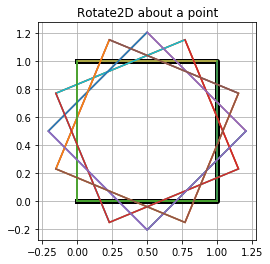

In [52]:
#the code for test
pts = ar([[0,0],[1,0],[1,1],[0,1]])
plot(*pts.T,lw=5,color='k')                     #points (poly) to be rotated

for ang in arange(0,2*pi,pi/8):
    ots = Rotate2D(pts,ar([0.5,0.5]),ang)       #the results
    _ = plot(*ots.T)

_ = axis('image')
_ = grid(True)
_ = title('Rotate2D about a point')
show()

(112, 474, 218, 496)

(219, 481, 111, 489)

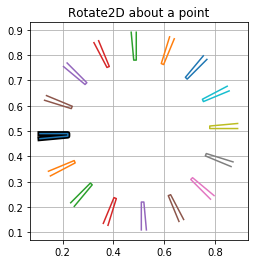

In [54]:
(112, 474, 218, 496)
(219, 481, 111, 489)
#the code for test
pts = ar([[0.11,0.47],[0.22,0.48],[0.22,0.49],[0.11,0.49]])
plot(*pts.T,lw=5,color='k')                     #points (poly) to be rotated

for ang in arange(0,2*pi,pi/8):
    ots = Rotate2D(pts,ar([0.5,0.5]),ang)       #the results
    _ = plot(*ots.T)

_ = axis('image')
_ = grid(True)
_ = title('Rotate2D about a point')
show()

In [30]:
ots.round()

array([[ 1.,  1.],
       [ 0.,  1.],
       [-0.,  0.],
       [ 1., -0.]])

array([[ 0., -0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [-0.,  1.]])

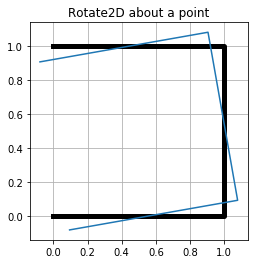

In [55]:
import math

pts = ar([[0,0],[1,0],[1,1],[0,1]])
plot(*pts.T,lw=5,color='k')                     #points (poly) to be rotated

# degree to radian
ang = math.radians(10)

ots = Rotate2D(pts,ar([0.5,0.5]),ang);  ots.round()  #the results
_ = plot(*ots.T)

_ = axis('image')
_ = grid(True)
_ = title('Rotate2D about a point')
show()

## Appendix

In [57]:
ots.round()

array([[ 0., -0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [-0.,  1.]])

In [61]:
ots[0]
x1, y1 = ots.round()[0][0], ots.round()[0][1]; x1, y1
x2, y2 = ots.round()[1][0], ots.round()[1][1]; x2, y2
x3, y3 = ots.round()[2][0], ots.round()[2][1]; x3, y3
x4, y4 = ots.round()[3][0], ots.round()[3][1]; x4, y4

array([ 0.09442021, -0.07922797])

(0.0, -0.0)

(1.0, 0.0)

(1.0, 1.0)

(-0.0, 1.0)

In [34]:
ots.T

array([[ 1.00000000e+00,  5.55111512e-17, -1.11022302e-16,
         1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  5.55111512e-17,
        -1.11022302e-16]])

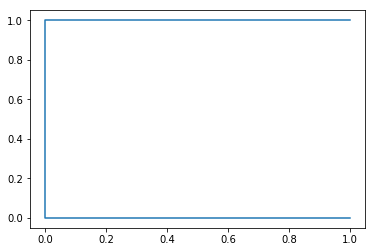

In [36]:
plot(*ots.T)

## Display

In [ ]:
def display_rotated(fname, df, idx, rotate_original=False):
    '''take in a filename (fname), a dataframe (df) that consists rows of columns[x1, y1, x3, y3, x2, y2, x4, y4, 'image_width', 'image_height' ],
       and display:  
           rotate_original == False
               a rotated rectangle superimposed onto image with original rotation.
            rorate_original == True
               a rotated rectangle superimposed onto image with rotation. '''
    
    angle = df.loc[idx, 'image_clockwiseOrientation']
    x1 = df.loc[idx, 'x1'] # top left, bottom right
    y1 = df.loc[idx, 'y1']
    x3 = df.loc[idx, 'x3']
    y3 = df.loc[idx, 'y3']; x1, y1, x3, y3

    x2 = df.loc[idx, 'x2'] # top right, bottom left
    y2 = df.loc[idx, 'y2']
    x4 = df.loc[idx, 'x4']
    y4 = df.loc[idx, 'y4']; x2, y2, x4, y4

    img_width = df.loc[idx, 'image_width']
    img_height = df.loc[idx, 'image_height']

    img = Image.open(fname)
    
    if rotate_original:
        img = img.rotate(angle=angle, resample=Image.BICUBIC, expand=False, center=(img_width/2, img_height/2)) # degree
        
    draw = ImageDraw.Draw(img)

    # draw as extracted
    draw.rectangle([x1, y1, x3, y3], outline='red', width=5)

    # rotate
    pts = scipy.array([[x1, y1],[x2, y2],[x3, y3],[x4, y4]])
    ang = -math.radians(angle); #ang
    anchor = scipy.array([img_width/2, img_height/2]); anchor
    ots = Rotate2D(pts, anchor, ang).round();  #ots

    # draw rotated
    x1, y1, x3, y3 = int(ots[0][0]), int(ots[0][1]), int(ots[2][0]), int(ots[2][1]); x1, y1, x3, y3
    draw.rectangle([x1, y1, x3, y3], outline='green', width=5)

    plt.figure(figsize=(20, 30))
    plt.imshow(img)
    return